In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import ast

from functions import q_drydown, exponential_drydown, loss_model

In [56]:
var_dict = {
    "theta": {
        "column_name": "",
        "symbol": r"$\theta$",
        "label": r"Soil moisture $\theta$",
        "unit": r"$[m^3/m^3]$",
        "lim": [0, 0.50],
    },
    "dtheta": {
        "column_name": "",
        "symbol": r"$-d\theta/dt$",
        "label": r"$-d\theta/dt$",
        "unit": r"$[m^3/m^3/day]$",
        "lim": [-0.10, 0],
    },
    "theta_norm": {
        "column_name": "",
        "symbol": r"$\theta_{norm}$",
        "label": r"Normalized soil moisture $\theta_{norm}$",
        "unit": r"$[-]$",
        "lim": [0, 1.0],
    },
    "dtheta_norm": {
        "column_name": "",
        "symbol": r"$-d\theta/dt$",
        "label": r"$-d\theta_{norm}/dt$",
        "unit": r"$[-/day]$",
        "lim": [-0.15, 0],
    },
    "t": {
        "column_name": "",
        "symbol": r"$t$",
        "label": r"Timestep $t$",
        "unit": r"$[day]$",
    },
}
theta_vardict = var_dict["theta"]
dtheta_vardict = var_dict["dtheta"]


/home/raraki/smap-drydown/notebooks/functions.py:24: RuntimeWarning: invalid value encountered in power
  return (-k * a * t + theta_0) ** (1 / (1 - q)) + theta_w


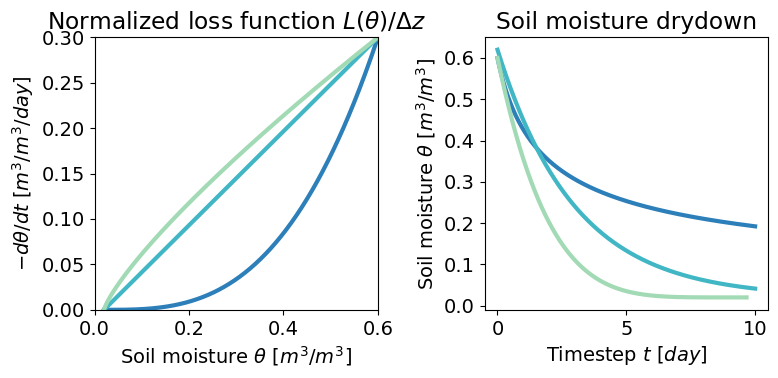

In [82]:
# Define variables 
theta = np.arange(theta_w, 1, 1e-03)
t = np.arange(0, 10, 1e-03)

# Define parameters
k=0.3
q0 = 1
q1 = 3.0
q2 = 0.8
t0 = 0.1

delta_theta= 0.6
tau = 3

theta_w = 0.02
theta_star = 0.6

fig = plt.figure(figsize=(8,4))
plt.rcParams.update({'font.size': 14})

# Calculate & plot d_theta
d_theta = loss_model(theta, q=1.5, k=-1)

c1 = f'#2c7fb8'
c2 = f'#41b6c4'
c3 = f'#a1dab4'
linewidth = 3

ax1 = fig.add_subplot(1,2,1)
ax1.plot(theta, -1*loss_model(theta=theta, q=q1, k=k, theta_wp=theta_w, theta_star=theta_star), label=f'q={q1}', linewidth=linewidth, color=c1)
ax1.plot(theta, -1*loss_model(theta, q=q0, k=k, theta_wp=theta_w, theta_star=theta_star), label=f'q={q0}', linewidth=linewidth, color=c2)
ax1.plot(theta, -1*loss_model(theta=theta, q=q2, k=k, theta_wp=theta_w, theta_star=theta_star), label=f'q={q2}', linewidth=linewidth, color=c3)
ax1.set_xlabel("theta")
ax1.set_ylabel("- d_theta (loss)")
ax1.set_ylim([0., k])
ax1.set_xlim([0., theta_star])
ax1.set(
    xlabel=f'{theta_vardict["label"]} {theta_vardict["unit"]}',
    ylabel=f'{dtheta_vardict["label"]} {dtheta_vardict["unit"]}',
    title=rf"Normalized loss function $L(\theta)/\Delta z$"
)

# Calculate & plot the drawdown
ax2 = fig.add_subplot(1,2,2)
ax2.plot(t, q_drydown(t=t, q=q1, k=k, delta_theta=delta_theta, theta_star=theta_star, theta_w = theta_w), label=f'q={q1}', linewidth=linewidth, color=c1)
ax2.plot(t, exponential_drydown(t=t, delta_theta=delta_theta, theta_w=theta_w, tau=tau), label=f'q={q0}', linewidth=linewidth, color=c2)
ax2.plot(t, q_drydown(t=t, q=q2, k=k, delta_theta=delta_theta,  theta_star=theta_star, theta_w = theta_w), label=f'q={q2}', linewidth=linewidth, color=c3)
ax2.set(
    xlabel=f'{var_dict["t"]["label"]} {var_dict["t"]["unit"]}',
    ylabel=f'{theta_vardict["label"]} {theta_vardict["unit"]}',
    title="Soil moisture drydown"
)


fig.tight_layout()
